## Implementing Dropout

### Importing the dataset

In [16]:
import pandas as pd
data=pd.read_csv('/Users/himanshugulechha/Desktop/MSc AI&ML/Sem3/DL/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Dropping unnecessary features

In [17]:
data.drop(columns=['CustomerId','RowNumber','Surname'],inplace=True)

### One Hot Encoding

In [18]:
data=pd.get_dummies(data,columns=['Geography'])

### Label Encoding

In [19]:
data['Gender']=data['Gender'].apply(lambda x: 1 if x=='Male' else 0)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


### Standardising

In [20]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
col=['CreditScore','Balance','EstimatedSalary','Age','Tenure','NumOfProducts']
for x in col:
    data[x]=mms.fit_transform(data[[x]])
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


### Separating Predictors and Target variable

In [21]:
X=data.drop(columns='Exited')
Y=data['Exited']

### Splitting the data into training and testing

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

### Importing necessary libraries and fitting the model without dropout

In [26]:
from keras.layers import Dense, Dropout, Activation
from keras.models import Sequential
model = Sequential([ 
    Dense(input_dim=12,units=64, activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=1, activation='sigmoid')
]) 

In [27]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) 

In [30]:
model.fit(X_train, y_train, epochs=100,  
          batch_size=1000,  
          validation_split=0.2) 

Epoch 1/100
7/7 [==============================] - 0s 6ms/step - loss: 0.3199 - accuracy: 0.8666 - val_loss: 0.3219 - val_accuracy: 0.8625
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3195 - accuracy: 0.8661 - val_loss: 0.3195 - val_accuracy: 0.8694
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3198 - accuracy: 0.8680 - val_loss: 0.3214 - val_accuracy: 0.8625
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3198 - accuracy: 0.8664 - val_loss: 0.3190 - val_accuracy: 0.8662
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3192 - accuracy: 0.8672 - val_loss: 0.3196 - val_accuracy: 0.8662
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3187 - accuracy: 0.8666 - val_loss: 0.3189 - val_accuracy: 0.8662
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3188 - accuracy: 0.8672 - val_loss: 0.3195 - val_accuracy: 0.8662
Epoch 8/100
7/7 [==========

7/7 [==============================] - 0s 3ms/step - loss: 0.3124 - accuracy: 0.8689 - val_loss: 0.3208 - val_accuracy: 0.8625
Epoch 60/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3119 - accuracy: 0.8695 - val_loss: 0.3210 - val_accuracy: 0.8625
Epoch 61/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3119 - accuracy: 0.8697 - val_loss: 0.3207 - val_accuracy: 0.8625
Epoch 62/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3118 - accuracy: 0.8689 - val_loss: 0.3205 - val_accuracy: 0.8625
Epoch 63/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3118 - accuracy: 0.8714 - val_loss: 0.3216 - val_accuracy: 0.8625
Epoch 64/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3118 - accuracy: 0.8720 - val_loss: 0.3214 - val_accuracy: 0.8619
Epoch 65/100
7/7 [==============================] - 0s 3ms/step - loss: 0.3118 - accuracy: 0.8689 - val_loss: 0.3207 - val_accuracy: 0.8650
Epoch 66/100
7/7 [===============

### Fitting the model with constant dropout

In [31]:
model1 = Sequential([ 
    Dense(input_dim=12,units=64, activation='relu'),
    Dropout(0.5),
    Dense(units=16, activation='relu'),
    Dropout(0.5),
    Dense(units=1, activation='sigmoid')
]) 

In [32]:
model1.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) 

In [33]:
model1.fit(X_train, y_train, epochs=100,  
          batch_size=1000,  
          validation_split=0.2) 

Epoch 1/100
7/7 [==============================] - 0s 11ms/step - loss: 0.7730 - accuracy: 0.4114 - val_loss: 0.6872 - val_accuracy: 0.5150
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.5517 - val_loss: 0.6325 - val_accuracy: 0.8081
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6410 - accuracy: 0.6639 - val_loss: 0.5952 - val_accuracy: 0.8094
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6072 - accuracy: 0.7284 - val_loss: 0.5619 - val_accuracy: 0.8094
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 0.5783 - accuracy: 0.7683 - val_loss: 0.5318 - val_accuracy: 0.8094
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 0.5594 - accuracy: 0.7783 - val_loss: 0.5086 - val_accuracy: 0.8094
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 0.5443 - accuracy: 0.7867 - val_loss: 0.4925 - val_accuracy: 0.8094
Epoch 8/100
7/7 [=========

7/7 [==============================] - 0s 4ms/step - loss: 0.4582 - accuracy: 0.8066 - val_loss: 0.4178 - val_accuracy: 0.8238
Epoch 60/100
7/7 [==============================] - 0s 4ms/step - loss: 0.4517 - accuracy: 0.8092 - val_loss: 0.4150 - val_accuracy: 0.8238
Epoch 61/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4509 - accuracy: 0.8087 - val_loss: 0.4134 - val_accuracy: 0.8263
Epoch 62/100
7/7 [==============================] - 0s 4ms/step - loss: 0.4490 - accuracy: 0.8091 - val_loss: 0.4141 - val_accuracy: 0.8288
Epoch 63/100
7/7 [==============================] - 0s 4ms/step - loss: 0.4493 - accuracy: 0.8089 - val_loss: 0.4119 - val_accuracy: 0.8281
Epoch 64/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4522 - accuracy: 0.8100 - val_loss: 0.4107 - val_accuracy: 0.8281
Epoch 65/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4461 - accuracy: 0.8094 - val_loss: 0.4100 - val_accuracy: 0.8288
Epoch 66/100
7/7 [===============

### Fitting the model with varying dropout

In [39]:
model2 = Sequential([ 
    Dense(input_dim=12,units=64, activation='relu'),
    Dropout(0.4),
    Dense(units=16, activation='relu'),
    Dropout(0.3),
    Dense(units=1, activation='sigmoid')
]) 

In [40]:
model2.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) 

In [41]:
model2.fit(X_train, y_train, epochs=100,  
          batch_size=1000,  
          validation_split=0.2) 

Epoch 1/100
7/7 [==============================] - 0s 11ms/step - loss: 0.5868 - accuracy: 0.7487 - val_loss: 0.5320 - val_accuracy: 0.8094
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 0.5376 - accuracy: 0.7889 - val_loss: 0.4950 - val_accuracy: 0.8094
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 0.5218 - accuracy: 0.7958 - val_loss: 0.4811 - val_accuracy: 0.8094
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 0.5126 - accuracy: 0.7972 - val_loss: 0.4753 - val_accuracy: 0.8094
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 0.5085 - accuracy: 0.7975 - val_loss: 0.4712 - val_accuracy: 0.8094
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5013 - accuracy: 0.7975 - val_loss: 0.4683 - val_accuracy: 0.8094
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4969 - accuracy: 0.7970 - val_loss: 0.4661 - val_accuracy: 0.8094
Epoch 8/100
7/7 [=========

7/7 [==============================] - 0s 4ms/step - loss: 0.4159 - accuracy: 0.8242 - val_loss: 0.3886 - val_accuracy: 0.8375
Epoch 60/100
7/7 [==============================] - 0s 4ms/step - loss: 0.4142 - accuracy: 0.8231 - val_loss: 0.3875 - val_accuracy: 0.8375
Epoch 61/100
7/7 [==============================] - 0s 4ms/step - loss: 0.4159 - accuracy: 0.8214 - val_loss: 0.3864 - val_accuracy: 0.8394
Epoch 62/100
7/7 [==============================] - 0s 4ms/step - loss: 0.4151 - accuracy: 0.8248 - val_loss: 0.3856 - val_accuracy: 0.8381
Epoch 63/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4137 - accuracy: 0.8234 - val_loss: 0.3833 - val_accuracy: 0.8394
Epoch 64/100
7/7 [==============================] - 0s 3ms/step - loss: 0.4089 - accuracy: 0.8236 - val_loss: 0.3834 - val_accuracy: 0.8400
Epoch 65/100
7/7 [==============================] - 0s 4ms/step - loss: 0.4108 - accuracy: 0.8242 - val_loss: 0.3823 - val_accuracy: 0.8425
Epoch 66/100
7/7 [===============

### Fitting the model with Monte Carlo dropout

In [42]:
model3 = Sequential([ 
    Dense(input_dim=12,units=64, activation='relu'),
    Dropout(0.2),
    Dense(units=16, activation='relu'),
    Dropout(0.2),
    Dense(units=1, activation='sigmoid')
]) 

In [43]:
model3.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) 

In [45]:
for _ in range(100):
        model.fit(X_train, y_train, batch_size=1000, epochs=1, validation_split=0.2, verbose=0)
        model.reset_metrics()

In [46]:
import numpy as np
y_preds = np.stack([model3.predict(X_test) for _ in range(100)]) 
y_mean = np.mean(y_preds, axis=0) 
y_std = np.std(y_preds, axis=0) 

63/63 [==============================] - 0s 317us/step


### Making predictions

In [64]:
import numpy as np
Y_PREC = np.where(1 , model.predict(X_test) > 0.5, 0)
Y_PREC1 = np.where(1 , model1.predict(X_test) > 0.5, 0)
Y_PREC2 = np.where(1 , model2.predict(X_test) > 0.5, 0)
Y_PREC3 = np.where(1 , y_mean > 0.5, 0)

63/63 [==============================] - 0s 322us/step


### Evaluating the model

<BarContainer object of 4 artists>

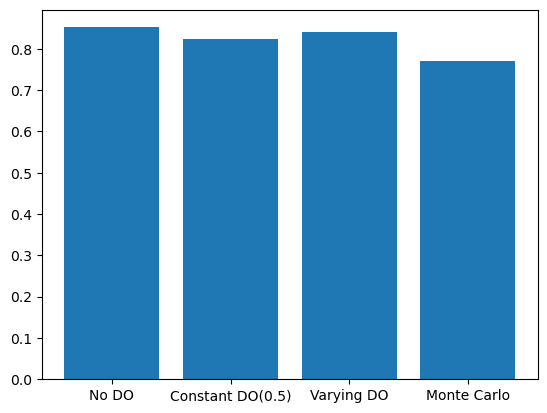

In [66]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
models=['No DO','Constant DO(0.5)','Varying DO','Monte Carlo']
acc=[accuracy_score(y_test,Y_PREC),accuracy_score(y_test,Y_PREC1),accuracy_score(y_test,Y_PREC2),accuracy_score(y_test,Y_PREC3)]
plt.bar(models,acc)

### Comparing using ROC curve

Text(0.5, 1.0, 'Receiver operating characteristic')

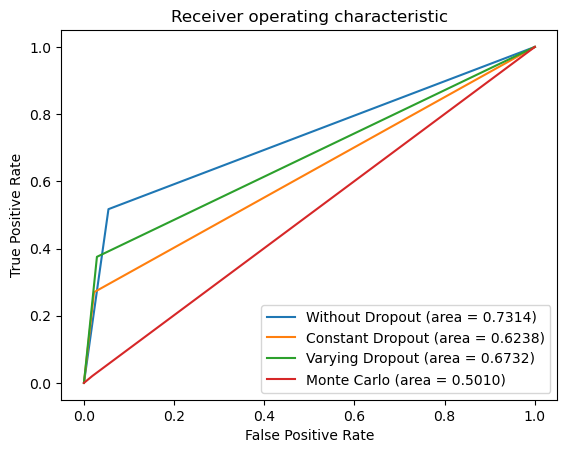

In [67]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
roc_auc=roc_auc_score(y_test,Y_PREC)
roc_auc1=roc_auc_score(y_test,Y_PREC1)
roc_auc2=roc_auc_score(y_test,Y_PREC2)
roc_auc3=roc_auc_score(y_test,Y_PREC3)
fpr, tpr,_= roc_curve(y_test,Y_PREC)
fpr1, tpr1,_= roc_curve(y_test,Y_PREC1)
fpr2, tpr2,_= roc_curve(y_test,Y_PREC2)
fpr3, tpr3,_= roc_curve(y_test,Y_PREC3)
plt.figure()
plt.plot(fpr, tpr,label='Without Dropout (area = %0.4f)' % roc_auc)
plt.plot(fpr1, tpr1, label='Constant Dropout (area = %0.4f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='Varying Dropout (area = %0.4f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='Monte Carlo (area = %0.4f)' % roc_auc3)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')